In [12]:
from pyspark.sql import SparkSession

# Membuat SparkSession (kalau belum ada)
spark = SparkSession.builder.appName("HandsOn9").getOrCreate()
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')

#ganti code disini

spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()

+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



In [15]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries

spark.sql('''
SELECT 
    e.Name,
    e.DeptId,
    d.DeptName,
    e.Age,
    e.Salary,
    AVG(e.Salary) OVER (PARTITION BY e.DeptId ORDER BY e.Age) AS AvgSalaryTrend
FROM employees e
JOIN departments d 
    ON e.DeptId = d.DeptId
''').show()



+-----+------+---------+---+------+--------------+
| Name|DeptId| DeptName|Age|Salary|AvgSalaryTrend|
+-----+------+---------+---+------+--------------+
|  Lee|     1|       HR| 23|  2700|        2700.0|
|James|     1|       HR| 34|  3000|        2850.0|
| Anna|     2|Marketing| 28|  4100|        4100.0|
+-----+------+---------+---+------+--------------+



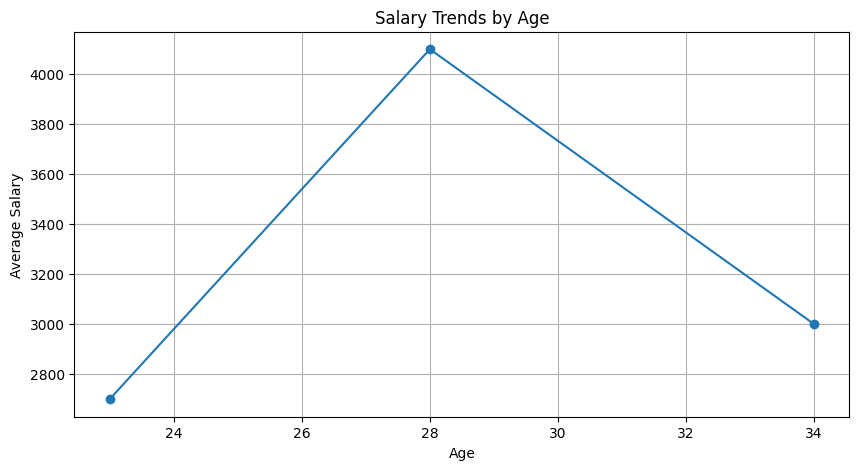

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


In [17]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 5.6 MB/s  0:00:015.8 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 7.1 MB/s  0:00:007.6 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.9 MB/s  0:00:00m 6.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 6.5 MB/s  0:00:01m 7.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib] 6/7 [matplotlib]ow]
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


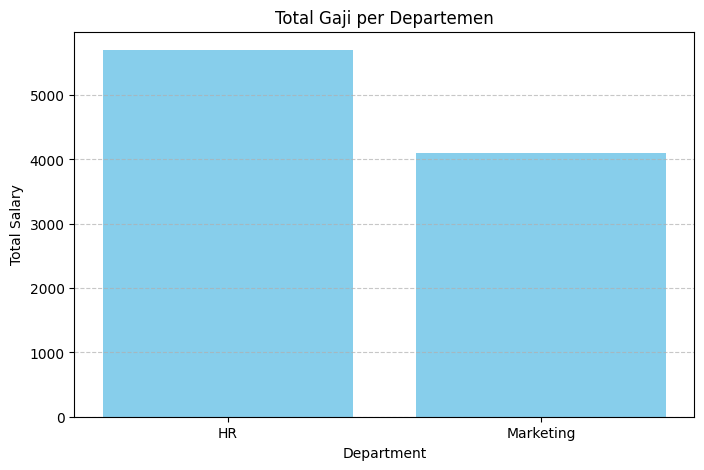

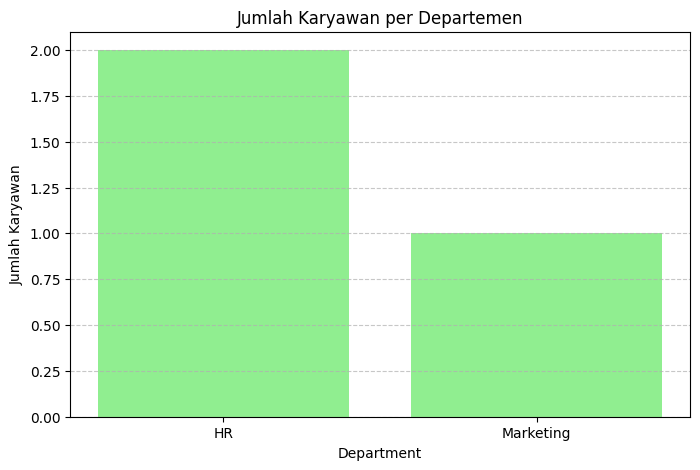

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Query Spark SQL: total gaji dan jumlah karyawan per departemen
dept_summary = spark.sql('''
SELECT 
    d.DeptName,
    SUM(e.Salary) AS TotalSalary,
    COUNT(e.Name) AS EmployeeCount
FROM employees e
JOIN departments d 
    ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY TotalSalary DESC
''').toPandas()

# Visualisasi perbandingan total gaji antar departemen
plt.figure(figsize=(8, 5))
plt.bar(dept_summary['DeptName'], dept_summary['TotalSalary'], color='skyblue')
plt.xlabel('Department')
plt.ylabel('Total Salary')
plt.title('Total Gaji per Departemen')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# (Opsional) Visualisasi jumlah karyawan per departemen
plt.figure(figsize=(8, 5))
plt.bar(dept_summary['DeptName'], dept_summary['EmployeeCount'], color='lightgreen')
plt.xlabel('Department')
plt.ylabel('Jumlah Karyawan')
plt.title('Jumlah Karyawan per Departemen')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


     Name  Age  Salary
0     Kim   23    2800
1    Anna   28    4100
2  Robert   34    3500


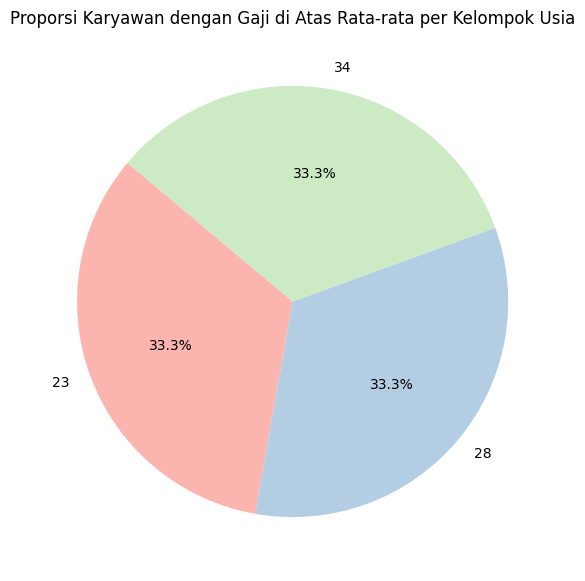

In [30]:
# Pastikan tampilan grafik aktif di Jupyter
%matplotlib inline

# Import library yang diperlukan
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession

# ==========================
# Spark Session & Data Setup
# ==========================
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data employees
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Robert', 34, 'M', 3500, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Maria', 28, 'F', 3900, 2),
    ('Lee', 23, 'M', 2700, 1),
    ('Kim', 23, 'F', 2800, 2)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])


# Data departments
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])

# Data projects
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])

# Buat temporary view
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# ==========================
# Query Spark SQL: karyawan gaji di atas rata-rata per kelompok usia
# ==========================
high_salary_by_age = spark.sql('''
SELECT 
    e.Name,
    e.Age,
    e.Salary
FROM employees e
JOIN (
    SELECT Age, AVG(Salary) AS AvgSalary
    FROM employees
    GROUP BY Age
) avg_age
ON e.Age = avg_age.Age
WHERE e.Salary > avg_age.AvgSalary
ORDER BY e.Age
''').toPandas()

# Cek data
print(high_salary_by_age)

# ==========================
# Pie Chart: jumlah karyawan per kelompok usia
# ==========================
count_by_age = high_salary_by_age.groupby('Age').size()

plt.figure(figsize=(7, 7))
plt.pie(
    count_by_age,
    labels=count_by_age.index.astype(str),
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title('Proporsi Karyawan dengan Gaji di Atas Rata-rata per Kelompok Usia')
plt.show()


25/11/01 17:32:49 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


Summary per Departemen:
      DeptName  NumEmployees    AvgSalary  TotalSalary
0           HR            39  5986.897436       233489
1      Support            34  6454.147059       219441
2  Engineering            33  5640.424242       186134
3        Sales            22  5859.136364       128901
4    Marketing            22  5546.545455       122024

Avg Salary per Project + Dept:
      DeptName ProjectName  AvgSalaryPerProjectDept  NumEmployeesOnDept
0           HR  Project_10              5986.897436                  39
1           HR   Project_1              5986.897436                  39
2        Sales   Project_9              5859.136364                  22
3        Sales   Project_5              5859.136364                  22
4        Sales   Project_6              5859.136364                  22
5  Engineering   Project_2              5640.424242                  33
6  Engineering   Project_3              5640.424242                  33
7    Marketing   Project_7            

/tmp/ipykernel_10049/3353643720.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_summary, x='DeptName', y='TotalSalary', palette='viridis')


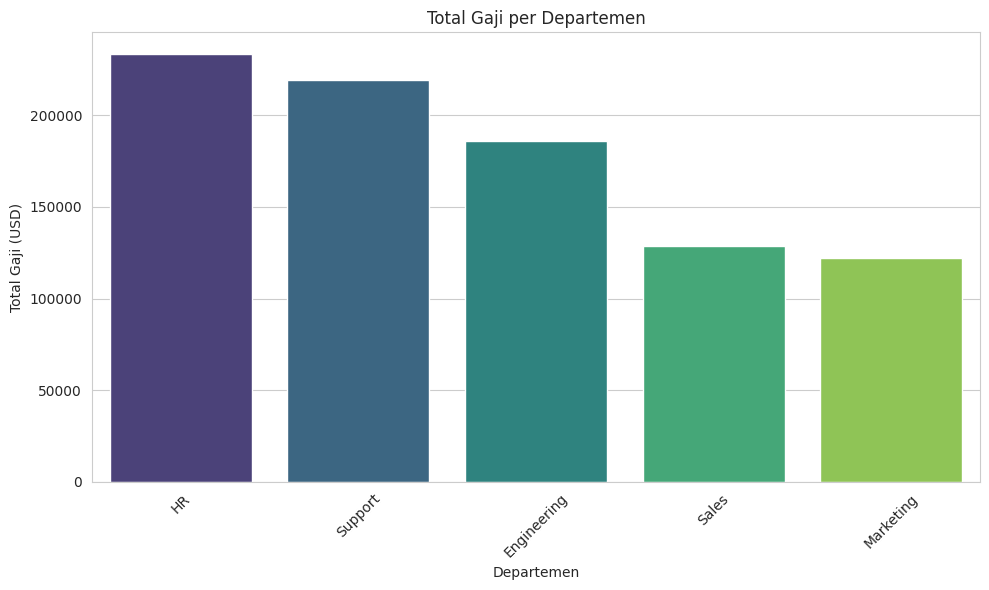

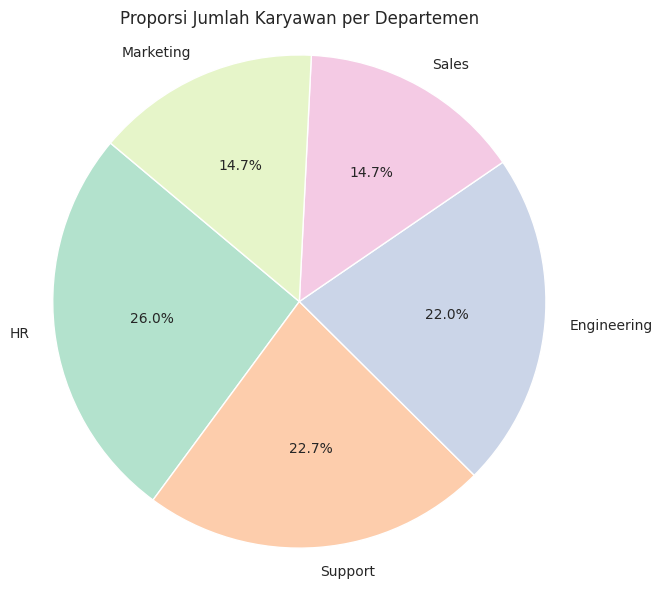

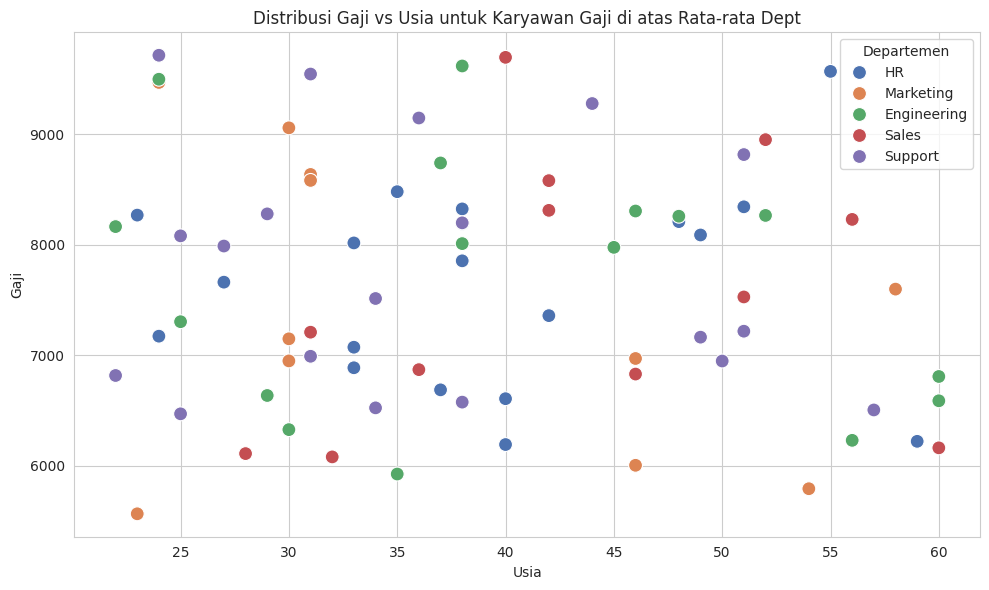

In [33]:
# Pastikan grafik muncul di Jupyter
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, sum as _sum, count, col

# Inisialisasi Spark
spark = SparkSession.builder.appName('Tugas3_Analisis').getOrCreate()

# ==========================
# 1) Buat Dataset Besar (~100+ baris) 
# ==========================
# Untuk demonstrasi kita akan generate secara programatik
import random

# Contoh tabel: employees (~150 baris)
employees_data = [
    (
        f'Name_{i}',
        random.randint(22, 60),                   # Age antara 22–60
        random.choice(['M', 'F']),                 # Gender
        random.randint(2000, 10000),              # Salary
        random.randint(1, 5)                       # DeptId antara 1–5
    )
    for i in range(1, 151)
]
employees = spark.createDataFrame(employees_data, ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])

# Tabel departments (~5 baris)
departments_data = [
    (1, 'HR'),
    (2, 'Marketing'),
    (3, 'Engineering'),
    (4, 'Sales'),
    (5, 'Support')
]
departments = spark.createDataFrame(departments_data, ['DeptId', 'DeptName'])

# Tabel projects (~10 baris) — beberapa proyek per dept
projects_data = [
    (random.randint(1,5), f'Project_{j}') for j in range(1,11)
]
projects = spark.createDataFrame(projects_data, ['DeptId', 'ProjectName'])

# Create temp views untuk SQL
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# ==========================
# 2) Analisis SQL dengan gabungan tabel + fungsi agregasi
# ==========================

# Contoh A) Statistik dasar per departemen: jumlah karyawan, rata‑rata gaji, total gaji
dept_summary = spark.sql('''
SELECT
  d.DeptName,
  COUNT(e.Name) AS NumEmployees,
  AVG(e.Salary) AS AvgSalary,
  SUM(e.Salary) AS TotalSalary
FROM employees e
JOIN departments d
  ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY TotalSalary DESC
''').toPandas()

print("Summary per Departemen:")
print(dept_summary)

# Contoh B) Projek per departemen + rata‑rata gaji di departemen tersebut
dept_proj_salary = spark.sql('''
SELECT
  d.DeptName,
  p.ProjectName,
  AVG(e.Salary) AS AvgSalaryPerProjectDept,
  COUNT(e.Name) AS NumEmployeesOnDept
FROM employees e
JOIN departments d
  ON e.DeptId = d.DeptId
JOIN projects p
  ON e.DeptId = p.DeptId
GROUP BY d.DeptName, p.ProjectName
ORDER BY AvgSalaryPerProjectDept DESC
''').toPandas()

print("\nAvg Salary per Project + Dept:")
print(dept_proj_salary.head(10))

# Contoh C) Karyawan yang gajinya di atas rata-rata dari departemennya
above_avg = spark.sql('''
SELECT e.Name, e.Age, e.Gender, e.Salary, d.DeptName
FROM employees e
JOIN departments d
  ON e.DeptId = d.DeptId
WHERE e.Salary >
  (
    SELECT AVG(e2.Salary)
    FROM employees e2
    WHERE e2.DeptId = e.DeptId
  )
''').toPandas()

print("\nKaryawan dengan Gaji > Rata-rata dept:")
print(above_avg.head(20))

# ==========================
# 3) Visualisasi yang menarik
# ==========================
sns.set_style("whitegrid")

# Visualisasi A) Bar chart: Total Salary per Departemen
plt.figure(figsize=(10,6))
sns.barplot(data=dept_summary, x='DeptName', y='TotalSalary', palette='viridis')
plt.title('Total Gaji per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Total Gaji (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi B) Pie chart: Proporsi jumlah karyawan per departemen
plt.figure(figsize=(7,7))
plt.pie(
    dept_summary['NumEmployees'],
    labels=dept_summary['DeptName'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel2.colors
)
plt.title('Proporsi Jumlah Karyawan per Departemen')
plt.axis('equal')
plt.show()

# Visualisasi C) Scatter plot: Gaji vs Usia untuk karyawan > rata-rata dept
plt.figure(figsize=(10,6))
sns.scatterplot(data=above_avg, x='Age', y='Salary', hue='DeptName', palette='deep', s=100, edgecolor='w')
plt.title('Distribusi Gaji vs Usia untuk Karyawan Gaji di atas Rata‑rata Dept')
plt.xlabel('Usia')
plt.ylabel('Gaji')
plt.legend(title='Departemen')
plt.tight_layout()
plt.show()
